# K-Nearest Neighbors

The *K-Nearest Neighbors* algorithm is simple. Predict a record according to how similar it is to other records.

## Pros
- Highly explainable and interpretable.
- Computationally simple.

## Cons
- Results depend on how features are scaled, similarity measured, and how big $K$ is set.
- All features should be numeric; categorical features do not work well with KNN.
- High prediction cost.
- Not good with high dimensional data.

## References
1. Practical Statistics for Data Scientists, Chapter 6: K-Nearest Neighbors

$K$ is the number of points closest to $x$ point in space.

## KNN for Classification

When KNN is used for classification, the output can be calculated as the class with the highest frequency from the "K-most similar" instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction. Ties can be broke randomly.

## KNN for Regression

When KNN is used for regression problems the prediction is the mean or the median of the "K-most similar" instances.

## Euclidean Distance

KNN is commonly calculated by Euclidean distance:

$$
    d = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \cdots + (q_n + p_n)^2}
$$

where $q_1$ to $q_n$ represent the feature values for one observation and $p_1$ to $p_n$ represent the feature values for the other observation.

Euclidean distance corresponds to the straight-line distance between two points.

## Manhattan Distance

Manhattan distance is an alternative:

$$
    d= |x_1 - u_1| + |x_2 - u_2| + \cdots + |x_p - u_p|
$$

Manhattan distiance is the distance between to points traversed in a single direction at a time.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer, load_boston
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_iris()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris = pd.DataFrame(data=data['data'], columns=column_names)
iris = pd.concat([iris, pd.Series(data['target'], name='species')], axis=1)

In [5]:
target_map = {0: 'setosa', 1: 'versicolor', 2:'virginica'}

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


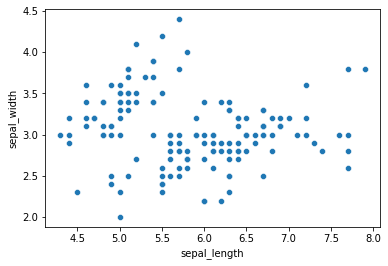

In [9]:
_ = sns.scatterplot(data=iris, x='sepal_length', y='sepal_width')

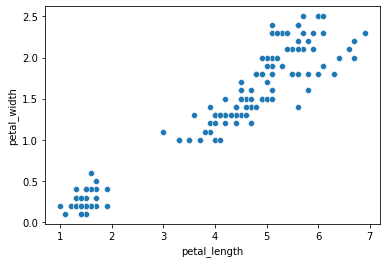

In [10]:
_ = sns.scatterplot(data=iris, x='petal_length', y='petal_width')

## K Nearest Neighbors Model (Classification)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We can get the class predictions.

In [15]:
y_pred = knnc.predict(X_test)

In [16]:
y_pred[:5]

array([2, 1, 0, 2, 0])

We can also get the class prediction probabilities.

In [17]:
y_proba = knnc.predict_proba(X_test)

In [18]:
y_proba[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### Model Parameters

We can get the K-Neighbors to a point.

In [19]:
y_neighbors = knnc.kneighbors(X_test)

With the distances to the points.

In [20]:
y_neighbors[0][:5]

array([[0.50990195, 0.50990195, 0.51961524],
       [0.48989795, 0.51961524, 0.54772256],
       [0.34641016, 0.36055513, 0.41231056],
       [0.26457513, 0.43588989, 0.52915026],
       [0.1       , 0.14142136, 0.17320508]])

And the indices of those points.

In [21]:
y_neighbors[1][:5]

array([[107,  32,  64],
       [  9,  20, 117],
       [ 88,  43,  90],
       [ 94,  37,  74],
       [108,  95,  75]])

### Evaluation

In [22]:
import sklearn.metrics as met
import yellowbrick.classifier as ybc

In [23]:
accuracy = met.accuracy_score(y_test, y_pred)
precision = met.precision_score(y_test, y_pred, average='macro')
recall = met.recall_score(y_test, y_pred, average='macro')
f1_score = met.f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.97
Precision: 0.95
Recall: 0.97
F1 Score: 0.96


In [24]:
print(met.classification_report(y_test, y_pred, target_names=target_map.values()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



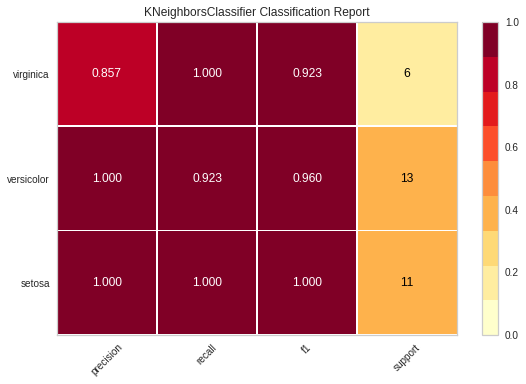

In [25]:
viz = ybc.ClassificationReport(knnc, is_fitted=True, encoder=target_map, support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

In [26]:
met.confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

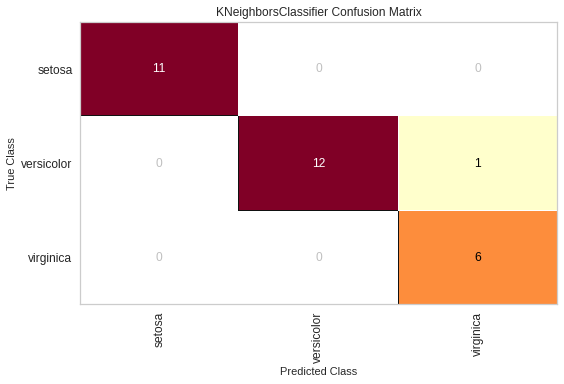

In [27]:
viz = ybc.ConfusionMatrix(knnc, is_fitted=True, encoder=target_map)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

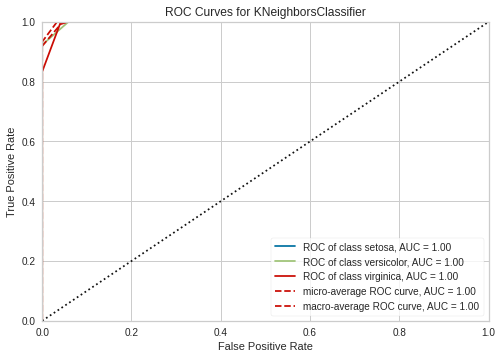

In [28]:
viz = ybc.ROCAUC(knnc, is_fitted=True, encoder=target_map)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

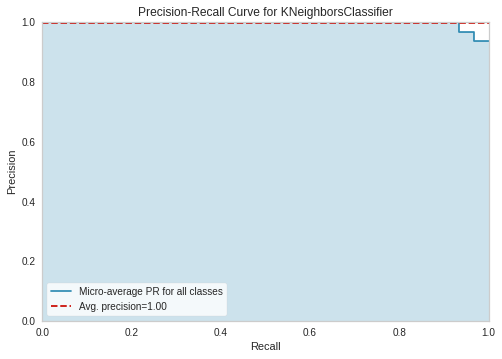

In [29]:
viz = ybc.PrecisionRecallCurve(knnc, encoder=target_map)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

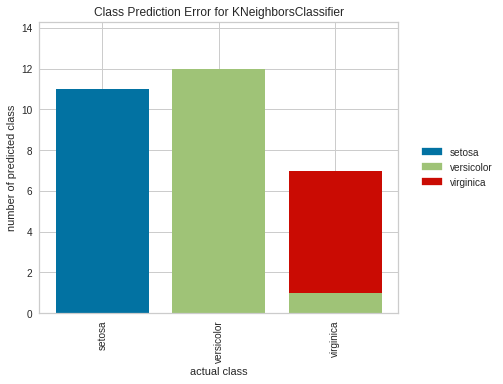

In [30]:
viz = ybc.ClassPredictionError(knnc, is_fitted=True, encoder=target_map)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

## K Nearest Neighbors (Regression)

In [31]:
data = load_boston()

In [32]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [33]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
boston = pd.DataFrame(data=data['data'], columns=data['feature_names'])
boston = pd.concat([boston, pd.Series(data['target'], name='MEDV')], axis=1)

In [35]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [39]:
y_pred = knnr.predict(X_test)

In [40]:
y_pred[:5]

array([23.36, 18.14, 19.88, 26.1 , 32.84])

### Model Parameters

In [41]:
y_neighbors = knnr.kneighbors(X_test)

In [42]:
# Distances to K=5 neighbors
y_neighbors[0][:5]

array([[ 5.71942876,  6.67092516, 13.47057624, 14.93888939, 15.17295044],
       [ 3.53334219,  3.89059066, 18.79224642, 26.05276893, 26.51742013],
       [ 4.9315164 , 12.55703848, 14.17244379, 14.77355417, 15.57519793],
       [12.16237222, 13.60153929, 23.51379459, 30.19150635, 30.5708341 ],
       [ 6.83863883, 11.69379417, 16.46223642, 17.28671897, 17.29264092]])

In [43]:
# Indices of neighbors
y_neighbors[1][:5]

array([[218, 248,  50, 339, 328],
       [231, 111, 141,  19, 217],
       [167,  35, 345,  36, 140],
       [163,  74, 245,  92, 144],
       [189,  54, 124,  44, 102]])

### Evaluation

In [44]:
import yellowbrick.regressor as ybr

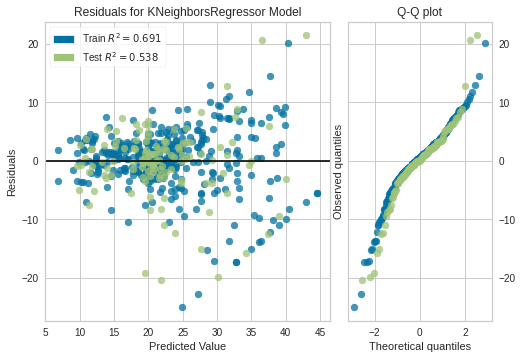

In [45]:
viz = ybr.ResidualsPlot(knnr, hist=False, qqplot=True, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

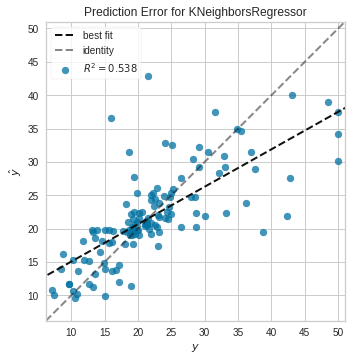

In [46]:
viz = ybr.PredictionError(knnr, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

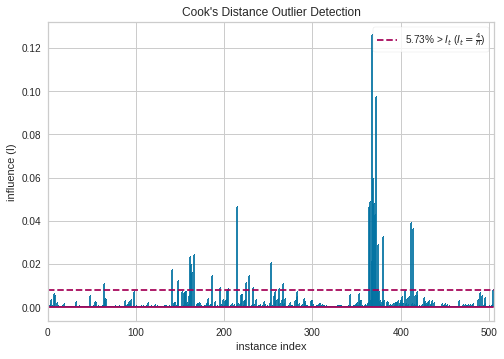

In [47]:
viz = ybr.CooksDistance()
viz.fit(X, y)
viz.show()
plt.show()